In [23]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import chardet
with open(FILEPATH, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

UsageError: Line magic function `%` not found.


In [24]:
FILEPATH = "../apple store app/Pokemon.csv"
df = pd.read_csv(FILEPATH,encoding='ISO-8859-1')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [25]:
df.describe()


,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.000000,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,76.000000,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,43.734045,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,1.000000,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,38.500000,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,76.000000,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,113.500000,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,151.000000,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


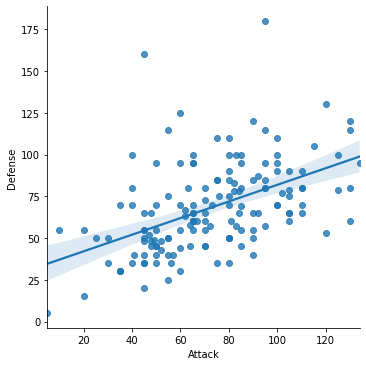

In [28]:
import seaborn as sns
sns.lmplot(x="Attack", y="Defense", data=df)


C:\Users\morey\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Attack by Type')

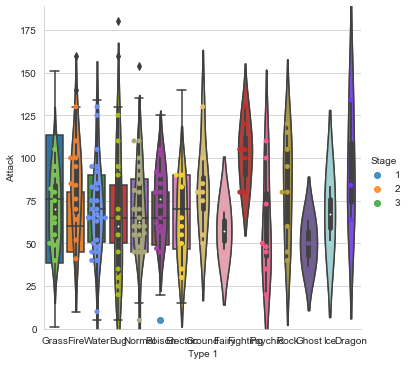

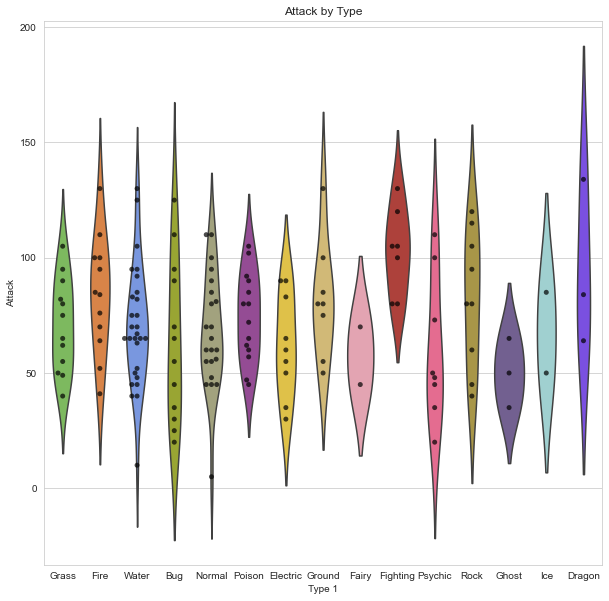

In [38]:
import seaborn as sns
sns.lmplot(x="Attack", y="Defense", data=df, fit_reg=False, hue='Stage')

plt.ylim(0, None)
plt.xlim(0, None)

stats_df = df.drop(["Total", "Stage", "Legendary"], axis=1)
sns.boxplot(data=stats_df)

sns.set_style("whitegrid")
sns.violinplot(x="Type 1", y="Attack", data=df)

pokemon_palette = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.violinplot(x="Type 1", y="Attack", data=df, palette=pokemon_palette)

sns.swarmplot(x="Type 1", y="Attack", data=df, palette=pokemon_palette)

plt.figure(figsize=(10,10))
sns.violinplot(x="Type 1",
               y="Attack",
               data=df,
               inner=None,
               palette=pokemon_palette)
sns.swarmplot(x="Type 1",
              y="Attack",
              data=df,
              color='k',
              alpha=0.7)
plt.title("Attack by Type")



C:\Users\morey\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\morey\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\morey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

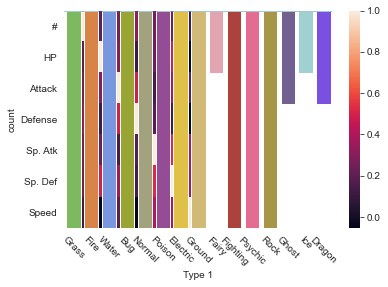

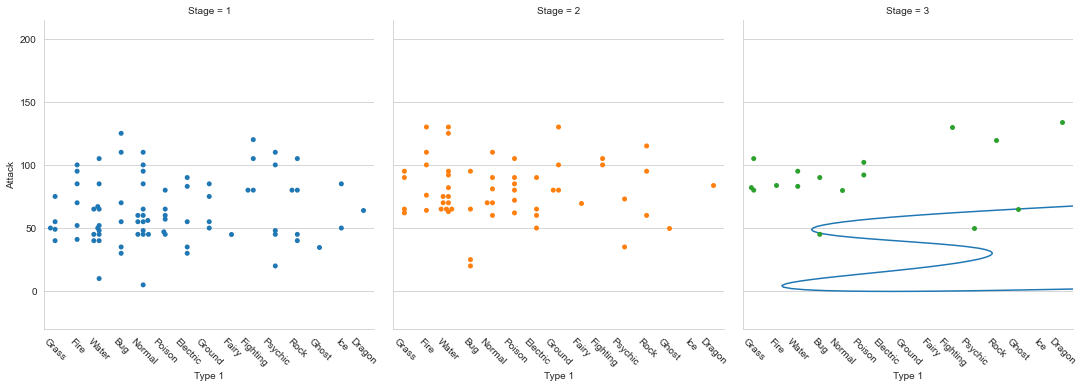

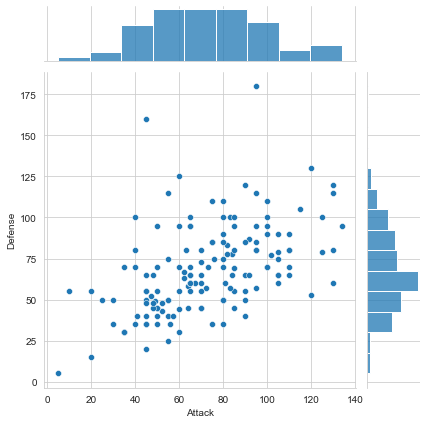

In [31]:
corr = stats_df.corr()
sns.heatmap(corr)

sns.distplot(df.Attack)

sns.countplot(x="Type 1", data=df, palette=pokemon_palette)
plt.xticks(rotation=-45)

viz = sns.factorplot(x="Type 1",
                   y="Attack",
                   data=df,
                   hue="Stage",
                   col="Stage",
                   kind="swarm")
viz.set_xticklabels(rotation=-45)

sns.kdeplot(df.Attack, df.Defense)

sns.jointplot(x="Attack", y="Defense", data=df)
